### Task 25
10. Класс – параллелепипед. Методы – расчет площади поверхности и объема параллелепипеда. Поля – ребра $a$, $b$, $c$, площадь и объем.

In [476]:
class Parallipiped:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        self.s = 0
        self.v = 0
        
    def find_surface(self):
        self.s = 2 * (self.a * self.b + self.a * self.c + self.b * self.c)
        return f"Площадь: {self.s}"

    def find_volume(self):
        self.v = self.a * self.b * self.c
        return f"Объем: {self.v}"

In [478]:
p = Parallipiped(2, 3, 4)
p.find_surface(), p.find_volume()

('Площадь: 52', 'Объем: 24')

### Task 26
10. Опишите класс `Account`. Для банковского счета задаются фамилия владельца, номер счёта, процент начисления за год и сумма в рублях. Включите в описание класса методы: пополнения счёта, снятия денег со счёта, перевода суммы в доллары и в евро, а также свойство, позволяющее начислить процент за заданное количество месяцев.

In [176]:
class Account:
    
    def __init__(self, surname, acc_num, percentage, balance):
        self.surname = surname
        self.acc_num = acc_num
        self.percentage = percentage
        self.balance = balance
        self.slov = {"euro": 101.22, "usd": 97.28}

    @property
    def full_info(self):
        print(f"Фамилия владельца: {self.surname}\nНомер счета: {self.acc_num} \nCумма в рублях: {self.balance} рублей \nПроцент начисления за год: {self.percentage}%")

    
    def refill_account(self, ammount):
        self.balance += ammount
        return self.balance
        
    def withdraw_money(self, ammount):
        self.balance -= ammount
        return self.balance


    def converter(self, currency):
        for key, value in self.slov.items():
            if key == currency:
                return f"{round(self.balance / value if value > 0 else "Ошибка", 2)} {currency}"
            else:
                continue
        else:
            return "Ошибка: вадюта не найдена"

In [178]:
def apply_percentage(object, months):
        if months > 0:
            monthly_rate = object.percentage / 12 / 100
            object.balance *= (1 + monthly_rate) ** months
        else:
            print("Количество месяцев должно быть положительным.")

In [180]:
acc = Account("Shipilov", 8456234, 15, 1000)
acc.refill_account(500)
acc.withdraw_money(900)

600

In [182]:
acc.full_info

Фамилия владельца: Shipilov
Номер счета: 8456234 
Cумма в рублях: 600 рублей 
Процент начисления за год: 15%


In [184]:
acc.converter("euro")

'5.93 euro'

In [186]:
acc.balance

600

In [188]:
apply_percentage(acc, 12)
acc.balance

696.4527106337988

### Task 27
10. Создайте класс ИГРУШКА с методами, позволяющими вывести на экран информацию о товаре, а также определить соответствие игрушки критерию поиска. Создайте дочерние классы КУБИК (цвет, цена, материал, размер ребра), МЯЧ (цена, цвет, диаметр, материал), МАШИНКА (название, цена, производитель, цвет) со своими методами вывода информации на экран и определения соответствия заданному цвету. Создайте список из $n$ игрушек, выведите полную информацию из базы на экран, а также организуйте поиск игрушек заданного цвета.

In [191]:
class Toy:
    def __init__(self, color, price):
        self.color = color 
        self.price = price
        
    def display_info(self):
        return f"Цвет: {self.color}; Цена: {self.price}"
        
    def matches_color(self, find_color):
        return self.color.lower() == find_color.lower()

class Cube(Toy):
    def __init__(self, color, price, material, size_of_edge):
        super().__init__(color, price)
        self.material = material
        self.size_of_edge = size_of_edge

    def display_info(self):
        return f"Куб - Цвет: {self.color}; Цена: {self.price}; Материал: {self.material}; Размер ребра: {self.size_of_edge}"

class Ball(Toy):
    def __init__(self, color, price, diameter, material):
        super().__init__(color, price)
        self.diameter = diameter
        self.material = material
         
    def display_info(self):
        return f"Мячик - Цвет: {self.color}; Цена: {self.price}; Материал: {self.material};  Диаметр: {self.diameter}"


class Car(Toy):
    def __init__(self, color, price, manufacturers, name):
        super().__init__(color, price)
        self.manufacturers = manufacturers
        self.name = name
         
    def display_info(self):
        return f"Машинка - Цвет: {self.color}; Цена: {self.price}; Название: {self.name};  Производитель: {self.manufacturers}"


In [193]:
toys = [
    Cube("Красный", 500, "Дерево", 52), 
    Ball("Белый", 153, 25, "Резина"), 
    Car("Темно-синий", 1500, "Hasbro", "Porsche 911 turbo s")
]

In [195]:
for toy in toys:
    print(toy.display_info())

Куб - Цвет: Красный; Цена: 500; Материал: Дерево; Размер ребра: 52
Мячик - Цвет: Белый; Цена: 153; Материал: Резина;  Диаметр: 25
Машинка - Цвет: Темно-синий; Цена: 1500; Название: Porsche 911 turbo s;  Производитель: Hasbro


In [197]:
find_color = "Красный"
for toy in toys:
    if toy.matches_color(find_color):
        print(toy.display_info())

Куб - Цвет: Красный; Цена: 500; Материал: Дерево; Размер ребра: 52


### Task 28
10. <br>а) Вывести ряд Фибоначчи до n чисел, используя лямбда-функцию.<br>б) Найти следующее после заданного число, полученное перестановкой цифр заданного числа. _Примеры_: `12` → `21`, `10` → `False`, `201` → `210`, `102` → `120`, `445` → `454`.<br>в) Напишите программу для поиска элементов заданного списка строк, содержащих определённую подстроку, используя лямбда-функцию. _Пример_: `['red', 'black', 'white', 'green', 'orange']`; `ack` → `['black']`; `abc` → `[]`.

#### Пункт а

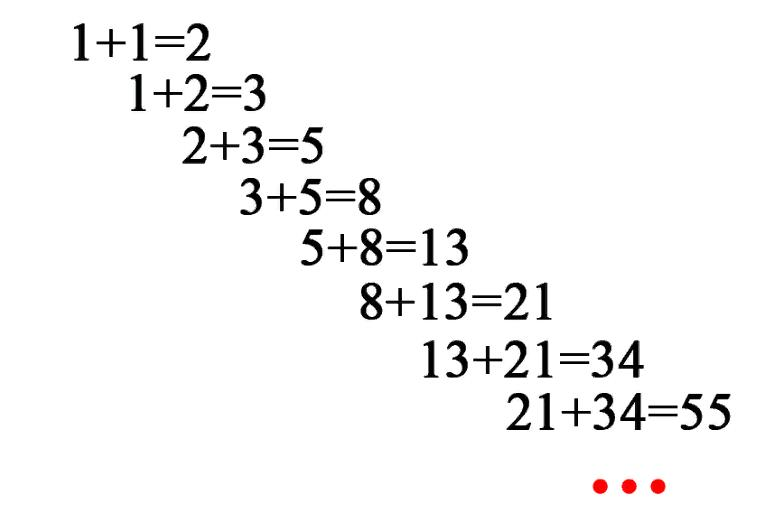

In [236]:
from functools import reduce



fib = lambda n: reduce(lambda x, _: x+[x[-1]+x[-2]], range(n-2), [0, 1])
fib(12)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

#### Пункт б

In [238]:
from itertools import permutations

res = lambda n: next((x for x in sorted(set(int("".join(p)) for p in permutations(str(n)))) if x > n), False)
res(12), res(10), res(201)

(21, False, 210)

#### Пункт в

In [244]:
colors = ['red', 'black', 'white', 'green', 'orange']
find = lambda x: [clr for clr in colors if x in clr]
find("ed")

['red']

### Task 29 

10. <br>а) Преобразуйте заданный список кортежей в список строк с помощью функции `map()`. _Пример_: `[('red', 'pink'), ('white', 'black'), ('orange', 'green')]` → `['red pink', 'white black', 'orange green']`; `[('Sheridan', 'Gentry'); ('Laila', 'Mckee'), ('Ahsan', 'Rivas'), ('Conna', 'Gonzalez')]` → `['Sheridan Gentry', 'Laila Mckee', 'Ahsan Rivas', 'Conna Gonzalez']`.<br>б) Сгенерировать список целых чисел. С помощью функции `filter()` выбрать из списка все числа кратные 3 и упорядочить их по возрастанию. Используя функцию `reduce()`, найти их произведение.

#### Пункт а) 

In [246]:
def task_a(x):
    return x[0] + " " + x[1]

arr = [('Sheridan', 'Gentry'), ('Laila', 'Mckee'), ('Ahsan', 'Rivas'), ('Conna', 'Gonzalez')]

res = list(map(task_a, arr))
res

['Sheridan Gentry', 'Laila Mckee', 'Ahsan Rivas', 'Conna Gonzalez']

#### Пункт б) 

In [248]:
import numpy as np

arr = list(np.random.randint(1, 100, size = (10, )))

def task_b(x):
    return x % 3 == 0

fileterd = list(filter(task_b, arr))
prod = reduce(lambda x, y: x * y, fileterd)
prod, fileterd

(50386050, [99, 87, 78, 75])

### Task 30


10. <br>а) Создайте декоратор, который будет проверять возвращаемое значение функции на корректность и заменять его на предопределенное значение при обнаружении некорректных данных.<br>б) Создайте декоратор, который будет заменять значение аргумента на заданное значение только если оно удовлетворяет определенному условию.

In [81]:
# Пункт а
from functools import wraps

def validate_output(validator, default_value):
    def decorator(func):
        @wraps(func) # Сохраняет метаданные функции
        def wrapper(*args, **kwargs):
            result = func(*args, **kwargs)
            if not validator(result):
                print(f"Некорректное значение: {result}. Заменяем на {default_value}")
                return default_value
            return result
        return wrapper
    return decorator


@validate_output(lambda x: x >= 0, 0)
def compute(x):
    return x - 10

print(compute(15))  
print(compute(5)) 

5
Некорректное значение: -5. Заменяем на 0
0


In [83]:
# Пункт б 
def replace_argument_if(condition, replacement_value):
    def decorator(func):
        @wraps(func)
        def wrapper(arg, *args, **kwargs):
            if condition(arg):
                print(f"Аргумент {arg} заменён на {replacement_value}")
                arg = replacement_value
            return func(arg, *args, **kwargs)
        return wrapper
    return decorator


@replace_argument_if(lambda x: x < 0, 0)
def process(value):
    print(f"Обрабатываем: {value}")

process(5)   
process(-3)

Обрабатываем: 5
Аргумент -3 заменён на 0
Обрабатываем: 0


### Task 31
10. <br>а) Написать функцию-генератор, которая создает все возможные варианты расположения заданных элементов на круговой доске.
<br>б) Написать функцию-генератор, которая создает все возможные варианты расположения изображений на сайте.
<br>в) Создать список всех возможных перестановок элементов заданного списка, используя выражение-генератор.
<br>г) Отсортировать список чисел в порядке возрастания, используя выражение-генератор.

In [14]:
from itertools import permutations

In [85]:
# Пункт а
def circular_permutations(elements):
    if not elements:
        return
    first = elements[0]
    for perm in permutations(elements[1:]):  
        yield (first,) + perm 


for arrangement in circular_permutations([1, 2, 3, 4]):
    print(arrangement)

(1, 2, 3, 4)
(1, 2, 4, 3)
(1, 3, 2, 4)
(1, 3, 4, 2)
(1, 4, 2, 3)
(1, 4, 3, 2)


In [89]:
# Пункт б 
def image_layouts(images):
    yield from permutations(images)


for layout in image_layouts(["img1.jpg", "img2.jpg", "img3.jpg"]):
    print(layout)

('img1.jpg', 'img2.jpg', 'img3.jpg')
('img1.jpg', 'img3.jpg', 'img2.jpg')
('img2.jpg', 'img1.jpg', 'img3.jpg')
('img2.jpg', 'img3.jpg', 'img1.jpg')
('img3.jpg', 'img1.jpg', 'img2.jpg')
('img3.jpg', 'img2.jpg', 'img1.jpg')


In [93]:
# Пункт в
elements = [1, 2, 3, 5]
permutations_list = list(permutation for permutation in permutations(elements))

permutations_list

[(1, 2, 3, 5),
 (1, 2, 5, 3),
 (1, 3, 2, 5),
 (1, 3, 5, 2),
 (1, 5, 2, 3),
 (1, 5, 3, 2),
 (2, 1, 3, 5),
 (2, 1, 5, 3),
 (2, 3, 1, 5),
 (2, 3, 5, 1),
 (2, 5, 1, 3),
 (2, 5, 3, 1),
 (3, 1, 2, 5),
 (3, 1, 5, 2),
 (3, 2, 1, 5),
 (3, 2, 5, 1),
 (3, 5, 1, 2),
 (3, 5, 2, 1),
 (5, 1, 2, 3),
 (5, 1, 3, 2),
 (5, 2, 1, 3),
 (5, 2, 3, 1),
 (5, 3, 1, 2),
 (5, 3, 2, 1)]

In [97]:
# Пункт г
numbers = [5, 2, 9, 1, 4]
sorted_numbers = [num for num in sorted(numbers)]

sorted_numbers

[1, 2, 4, 5, 9]

### Task 32
10. Используя модуль `array` и  библиотеку `numpy`, решить следующие задачи:<br>а) Дан массив $A$ размера $N$. Сформировать новый массив B того же размера по следующему правилу: элемент BK равен сумме элементов массива $A$ с номерами от $K$ до $N$.<br>б) Дана матрица размера $M×N$. Упорядочить ее строки так, чтобы их первые элементы образовывали возрастающую последовательность.

In [3]:
import numpy as np

In [13]:
def create_array_b(a):
    n = len(a)
    b = np.zeros(n, dtype=a.dtype)
    for k in range(n):
        b[k] = np.sum(a[k:]) 
    return b

A = np.array([1, 2, 3, 4, 5])
B = create_array_b(A)
B

array([15, 14, 12,  9,  5])

In [15]:
# пункт б

def sort_matrix(matrix):
    sorted_indices = np.argsort(matrix[:, 0])
    return matrix[sorted_indices]


M = np.array([
    [3, 5, 7],
    [1, 2, 3],
    [4, 5, 6],
    [2, 4, 6]
])

sorted_M = sort_matrix(M)
sorted_M

array([[1, 2, 3],
       [2, 4, 6],
       [3, 5, 7],
       [4, 5, 6]])